In [1]:
import datetime
import os
from datetime import datetime
from datetime import date
import time
from datetime import timedelta
import numpy as np
import pandas as pd
import matplotlib
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator, DateFormatter
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
#pip install scipy, pip install scipy-1.2.0-cp36-cp36m-win_amd64.whl
import scipy.io as sio
from scipy import stats
from scipy import ndimage
from skimage import data, io, filters
from mpl_toolkits.basemap import Basemap

import netCDF4# pip install netCDF4
import h5py# pip install h5py
import shapefile# pip install pyshp
from netCDF4 import Dataset
import xlrd# pip install xlrd,  .xls and .xlsx,
import xlwt# pip install xlwt, .xls
import pathlib#pip install pathlib2
from pathlib import Path

import seaborn as sns
import xgboost as xgb#pip install xgboost
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier#模型融合voting

# 机器学习算法
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.regression import mean_squared_error, r2_score

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'
#matplotlib.rcParams['font.family']='sans-serif' 
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif'] = ['Times New Roman'] 
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['axes.unicode_minus']=False 
font = FontProperties(fname=r"C:\\Windows\\Fonts\\times.ttf") 
%matplotlib inline

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
###########获取文件路径、文件名、后缀名############
def get_filename(filename):
  (filepath,tempfilename) = os.path.split(filename);
  (shotname,extension) = os.path.splitext(tempfilename);
  #return filepath, shotname, extension
  return shotname
################################################################################
# 字符串时间转换为计算机存储时间
def Normaltime1(datetime1):
    Normaltime = datetime.strptime(datetime1,'%Y-%m-%d %H_%M')
    return Normaltime

# datetime时间转为字符串
def Changestr(datetime1):
    str1 = datetime1.strftime('%Y-%m-%d %H:%M')
    return str1

#Excel时间序列处理方法一
def TS(x):
    return (x - np.datetime64('1970-01-01T00:00:00Z'))/np.timedelta64(1, 's')
    #return datetime.utcfromtimestamp(x.astype('O')/1e9)
    #return datetime.fromtimestamp(x.tolist()/1e9)

##Excel时间序列处理方法二
def DT(x):
    return datetime.utcfromtimestamp(x)

In [3]:
path=pathlib.Path('../data/')
xlsfile=path/'Rizhao_2019_03_Abstract.xlsx'
AQI=pd.DataFrame(pd.read_excel(xlsfile, sheet_name=u'小时值'))

In [4]:
AQI.head()

,Time,PM2.5,PM10,SO2,NO2,O3,CO,Length,T,Td,...,U_1000,V_1000,T_950,RH_950,U_950,V_950,T_850,RH_850,U_850,V_850
0,2019-03-01 08:00:00,130,218,36,66,5,3.2,525.164055,5.4,-0.4,...,-2.352791,-0.580595,5.241475,52.606887,-4.372481,0.113507,-1.66357,44.400302,-6.621171,-1.829805
1,2019-03-01 09:00:00,135,231,31,67,5,3.5,555.065491,5.4,-0.4,...,-2.352791,-0.580595,5.241475,52.606887,-4.372481,0.113507,-1.66357,44.400302,-6.621171,-1.829805
2,2019-03-01 10:00:00,129,228,39,65,10,2.4,515.160712,5.4,-0.4,...,-2.352791,-0.580595,5.241475,52.606887,-4.372481,0.113507,-1.66357,44.400302,-6.621171,-1.829805
3,2019-03-01 11:00:00,125,200,35,58,29,1.7,413.114180,11.4,0.5,...,-2.352791,-0.580595,5.241475,52.606887,-4.372481,0.113507,-1.66357,44.400302,-6.621171,-1.829805
4,2019-03-01 12:00:00,132,213,30,58,89,1.3,500.582604,11.4,0.5,...,-2.352791,-0.580595,5.241475,52.606887,-4.372481,0.113507,-1.66357,44.400302,-6.621171,-1.829805


In [5]:
AQI.tail()

,Time,PM2.5,PM10,SO2,NO2,O3,CO,Length,T,Td,...,U_1000,V_1000,T_950,RH_950,U_950,V_950,T_850,RH_850,U_850,V_850
262,2019-03-23 11:00:00,14,79,19,13,9999,0.2,377.907290,10.3,-8.4,...,6.439247,-4.325653,3.904341,50.470796,6.763036,-7.511312,-2.588073,55.573150,4.820303,-8.612951
263,2019-03-23 12:00:00,13,84,58,23,94,0.9,420.797898,10.3,-8.4,...,6.439247,-4.325653,3.904341,50.470796,6.763036,-7.511312,-2.588073,55.573150,4.820303,-8.612951
264,2019-03-23 13:00:00,16,74,20,12,78,0.3,433.355737,10.3,-8.4,...,6.439247,-4.325653,3.904341,50.470796,6.763036,-7.511312,-2.588073,55.573150,4.820303,-8.612951
265,2019-03-23 14:00:00,8,67,21,12,68,0.3,421.457894,11.4,-7.9,...,1.147882,-5.023186,5.099405,37.311716,1.754165,-4.982862,-3.595103,66.481961,4.399847,-3.586937
266,2019-03-23 15:00:00,6,50,14,10,74,0.2,389.782229,11.4,-7.9,...,1.147882,-5.023186,5.099405,37.311716,1.754165,-4.982862,-3.595103,66.481961,4.399847,-3.586937


In [6]:
AQI.describe()

,PM2.5,PM10,SO2,NO2,O3,CO,Length,T,Td,RH,...,U_1000,V_1000,T_950,RH_950,U_950,V_950,T_850,RH_850,U_850,V_850
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,75.973783,161.985019,25.172285,44.250936,373.041199,262.747566,632.811515,9.625094,-1.517978,50.434457,...,0.764724,0.042134,6.782908,42.125391,1.379555,-0.609374,1.078357,33.678021,2.409001,-2.147741
std,53.766021,87.739745,13.976091,23.767213,1695.340739,1600.549119,444.449700,3.704966,5.150427,21.986462,...,3.720608,4.250106,3.407488,18.292848,4.925936,5.470858,3.538509,17.059234,5.546416,5.584707
min,6.000000,24.000000,11.000000,9.000000,2.000000,0.100000,223.099605,2.000000,-11.800000,11.000000,...,-6.206346,-9.758347,-0.187499,14.878007,-6.494471,-12.126357,-4.582284,2.087629,-8.878307,-10.971523
25%,35.000000,93.500000,16.000000,23.000000,55.000000,0.300000,389.425286,6.800000,-4.700000,34.000000,...,-2.296479,-2.692928,4.936441,28.156023,-1.853499,-4.246719,-1.873542,23.444968,-1.255663,-6.814637
50%,58.000000,145.000000,21.000000,40.000000,82.000000,0.400000,518.102927,9.200000,-2.100000,48.000000,...,0.227196,0.276522,5.919444,37.953971,1.133804,-0.389266,0.864449,29.813991,2.716146,-2.080334
75%,117.500000,226.000000,30.000000,63.000000,100.500000,0.850000,687.735203,11.700000,2.600000,66.000000,...,3.928711,3.464755,9.278994,50.878746,5.307394,2.735048,3.437388,42.396231,5.875198,0.400070
max,237.000000,398.000000,123.000000,114.000000,9999.000000,9999.000000,3016.913504,21.700000,8.300000,100.000000,...,8.750817,6.895795,15.185367,100.714122,14.744194,13.577700,9.288396,100.262165,16.567734,16.023785


In [7]:
AQI=AQI.drop(columns=['T_1000','RH_1000','U_1000','V_1000','RH_950','RH_850','WD'])

In [8]:
AQI=AQI.replace(9999, np.nan)
AQI=AQI.dropna()

print('数据集：',AQI.shape)

数据集： (225, 19)


In [9]:
Variables=AQI.columns.values.tolist()
Variables

['Time',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'O3',
 'CO',
 'Length',
 'T',
 'Td',
 'RH',
 'WS',
 'VIS',
 'T_950',
 'U_950',
 'V_950',
 'T_850',
 'U_850',
 'V_850']

In [10]:
x_cols =['Length',
 'T',
 'RH',
 'WS',
 'VIS',
 'T_950',
 'U_950',
 'V_950',
 'T_850',
 'U_850',
 'V_850']

In [11]:
y_cols=['PM2.5']

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [13]:
Ran=list(range(1,100,1))
Ran

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

In [14]:
MSE_train=[]
MSE_test=[]
R2_train=[]
R2_test=[]
for i in Ran:
    X=AQI[x_cols]
    y=AQI[y_cols]
    X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    titlestr=str(i)+' Predict the particle concentration '
    #print(titlestr)
    #print (model)
    #print ("截距: "'%.0f'% linreg.intercept_)
    #print (linreg.coef_)
    #Mat=np.array(linreg.coef_).reshape(4,3)
    #print(Mat)
    #print("矩阵的秩: ",np.linalg.matrix_rank(Mat))
    pairs=list(zip(x_cols, linreg.coef_))
    #print(pairs)
    y_train_pred=linreg.predict(X_train)
    y_pred = linreg.predict(X_test)
    
    MSE_train_A=mean_squared_error(y_train,y_train_pred)
    MSE_test_A=mean_squared_error(y_test,y_pred)
    R2_train_A=r2_score(y_train,y_train_pred)
    R2_test_A=r2_score(y_test,y_pred)
    
    MSE_train.append(MSE_train_A)
    MSE_test.append(MSE_test_A)
    R2_train.append(R2_train_A)
    R2_test.append(R2_test_A)
    
    from sklearn import metrics
    #print (len(y_pred),len(y_test))
    sum_mean=0
    for i in range(len(y_pred)):
        sum_mean+=(y_pred[i]-y_test.values[i])**2
    sum_error=np.sqrt(sum_mean/11)
    #print ("RMSE: ",'%.0f'% sum_error)
    #print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
    #print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))

In [15]:
MSE_train=np.array(MSE_train)
print(MSE_train.min())
print(MSE_train.argmin(axis=0))

MSE_test=np.array(MSE_test)
print(MSE_test.min())
print(MSE_test.argmin(axis=0))

R2_train=np.array(R2_train)
print(R2_train.max())
print(R2_train.argmax(axis=0))

R2_test=np.array(R2_test)
print(R2_test.max())
print(R2_test.argmax(axis=0))

460.30968301562496
55
304.12039490226357
82
0.804050673143412
89
0.8351610980860781
43


截距: 268
[('Length', array([ 1.63970282e-03, -6.44597803e+00, -1.60848535e+00,  3.69387617e-01,
       -4.77174889e+00,  3.64106380e+00,  1.18132419e+00,  3.89929846e+00,
        1.22884391e+00, -3.57961434e+00, -3.73722005e+00]))]
RMSE:  51
MSE train: 577.554,test:501.978
R^2 train: 0.751,test:0.835


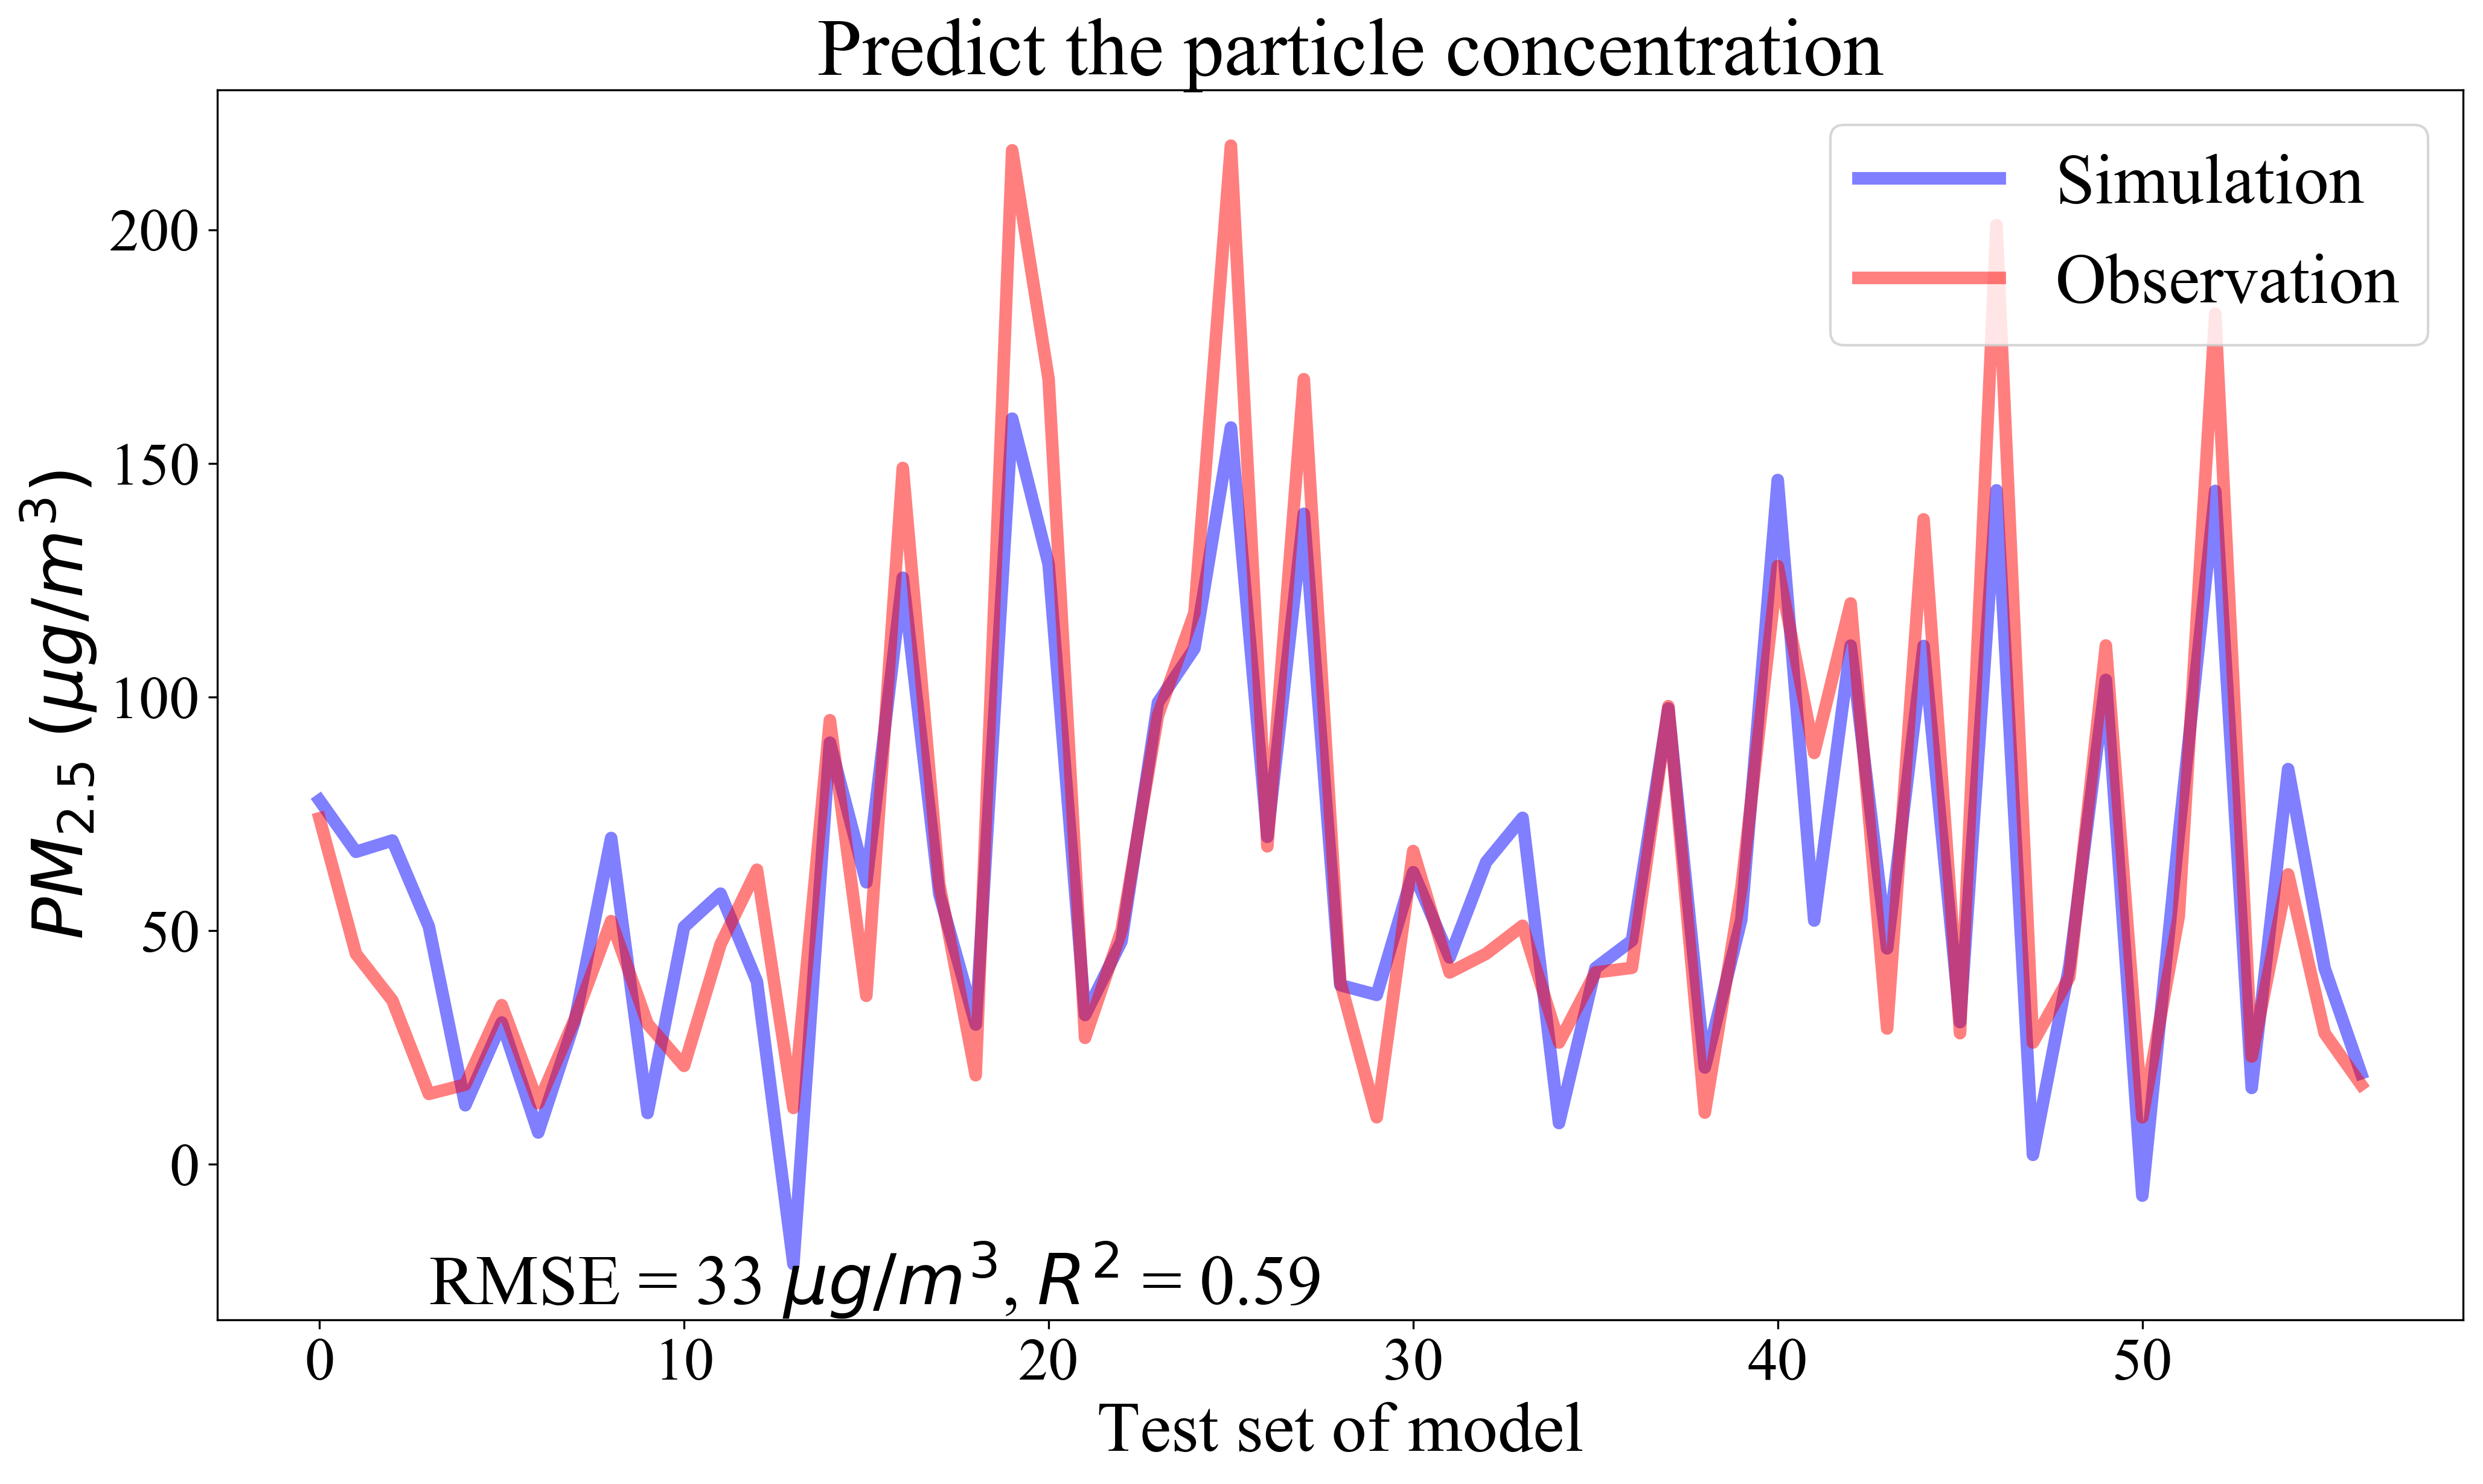

<Figure size 432x288 with 0 Axes>

In [16]:
X=AQI[x_cols]
y=AQI[y_cols]
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=44)
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
#print (model)
print ("截距: "'%.0f'% linreg.intercept_)
#print (linreg.coef_)
#Mat=np.array(linreg.coef_).reshape(4,3)
#print(Mat)
#print("矩阵的秩: ",np.linalg.matrix_rank(Mat))
pairs=list(zip(x_cols, linreg.coef_))
print(pairs)

y_pred = linreg.predict(X_test)
y_train_pred=linreg.predict(X_train)
from sklearn import metrics
#print (len(y_pred),len(y_test))
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_error=np.sqrt(sum_mean/11)
print ("RMSE: ",'%.0f'% sum_error)

print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))
fig = plt.figure(figsize=(16,9),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=24)
plt.plot(range(len(y_pred)),y_pred,'b',linestyle='solid',linewidth=5, alpha=0.5,label="Simulation")
plt.plot(range(len(y_pred)),y_test,'r',linestyle='solid',linewidth=5, alpha=0.5,label="Observation")
plt.legend(loc="upper right",fontsize=28) #显示图中的标签
plt.xlabel("Test set of model",fontsize=28)
plt.ylabel('$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
titlestr='  Predict the particle concentration '
plt.title(titlestr,fontsize=32)
plt.text(3,-30,'RMSE = 33 $ µg/m^3$, $R^2$ = 0.59',fontsize=28)
plt.savefig(str(titlestr)+'.png')
plt.show()
plt.clf()

24.03235499313089 22.40487544731205


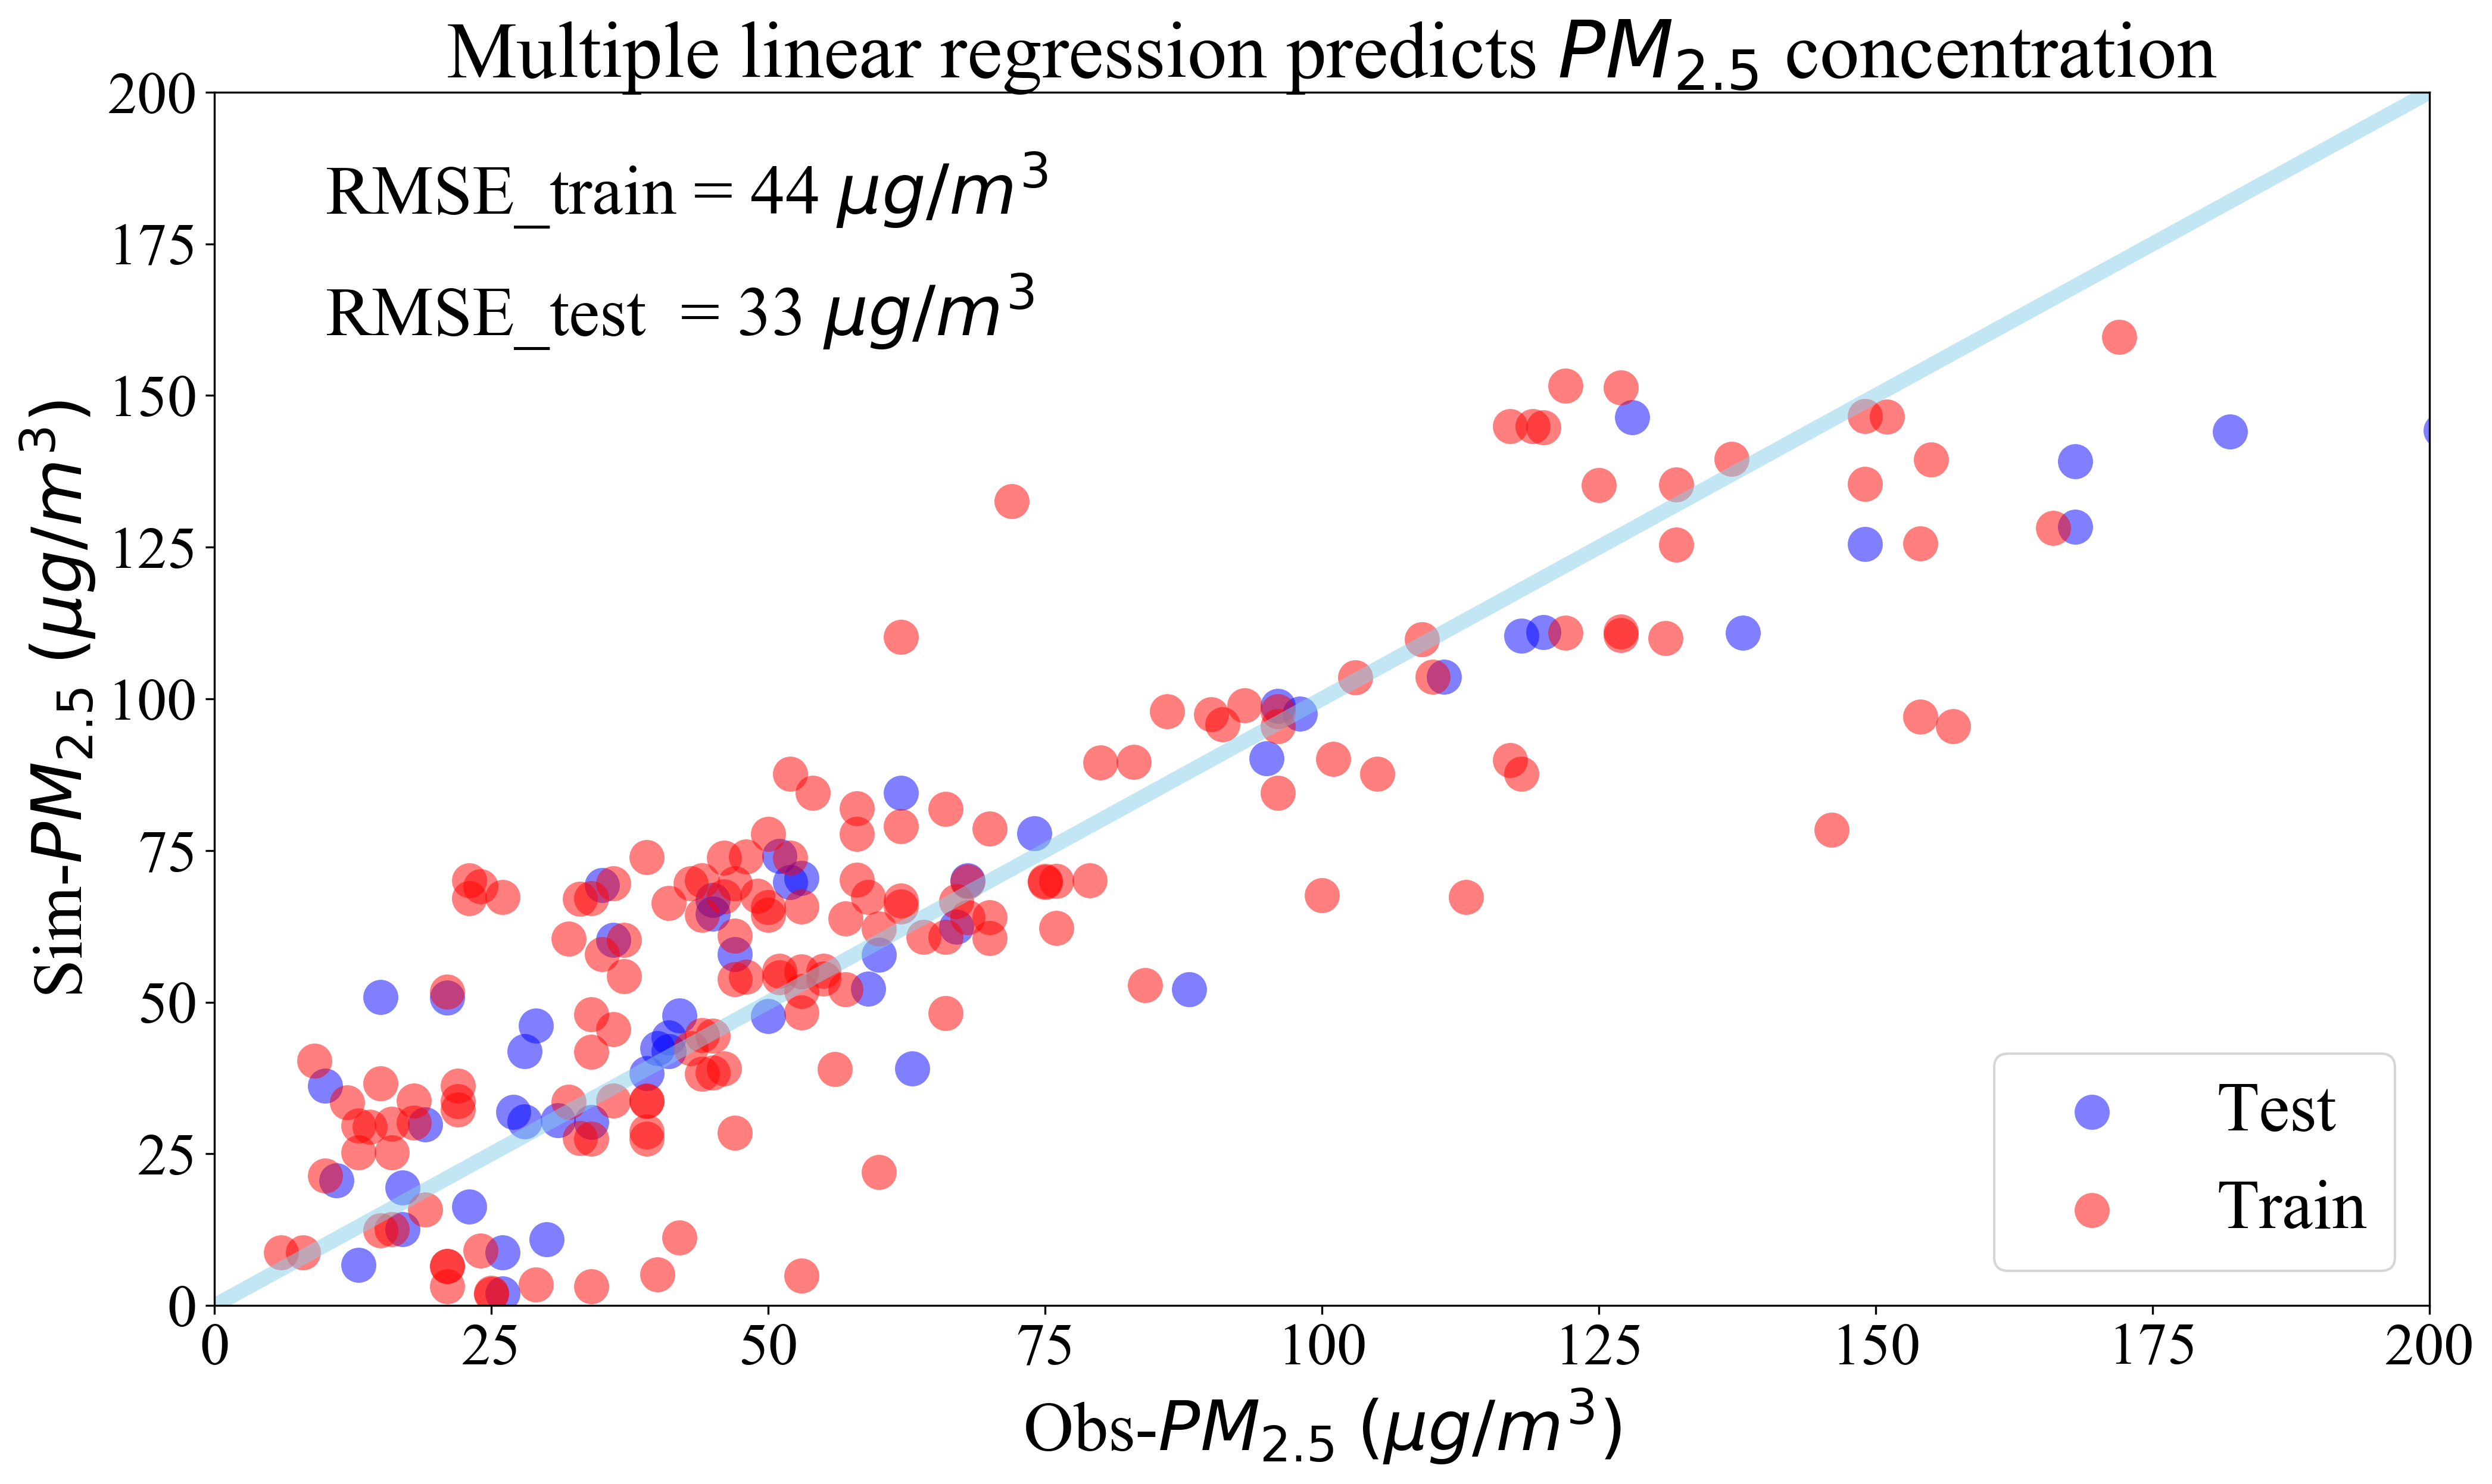

In [17]:
import math
RMSE_train=math.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=math.sqrt(mean_squared_error(y_test,y_pred))
#MSE_test_A=mean_squared_error(y_test,y_pred)
#R2_train_A=r2_score(y_train,y_train_pred)
R2_test_A=r2_score(y_test,y_pred)
print(RMSE_train,RMSE_test)

fig = plt.figure(figsize=(16,9),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=24)
#plt.plot(Time,PMC_sim,c='blue',marker = 'o',linewidth=3,alpha=0.5,label="Simulation")
#plt.plot(Time,PMC_obs,c='red', marker = 'o',linewidth=3,alpha=0.5,label="Observation")
#plt.scatter(PMC_obs,PMC_sim,c='red',s=200,marker = 'o',linewidth=0,alpha=0.5)
plt.scatter(y_test,y_pred,c='blue',s=200,marker = 'o',linewidth=0,alpha=0.5,label="Test")
plt.scatter(y_train,y_train_pred,c='red',s=200,marker = 'o',linewidth=0,alpha=0.5,label="Train")
x = np.arange(0, 200, 0.1)
y=x
plt.plot(x, y,c='skyblue',alpha=0.5,linewidth=6)
plt.ylim(0,200)
plt.xlim(0,200)
plt.legend(loc="lower right",fontsize=28) #显示图中的标签
plt.xlabel('Obs-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
plt.ylabel('Sim-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
titlestr=' Multiple linear regression predicts $PM_{2.5}$ concentration '
plt.title(titlestr,fontsize=32)
#plt.legend(loc="upper right",fontsize=28)
#plt.text(5,175,'Training set of model',fontsize=32)
plt.text(10,180,'RMSE_train = 44 $ µg/m^3$',fontsize=28)
plt.text(10,160,'RMSE_test  = 33 $ µg/m^3$',fontsize=28)
#plt.text(3,-30,'RMSE = 33 $ µg/m^3$,Intercept = 79 $ µg/m^3$',fontsize=28)
plt.savefig(str(titlestr)+'.png')
plt.show()

In [18]:
#以下为决策树回归

MSE_train=[]
MSE_test=[]
R2_train=[]
R2_test=[]

for i in Ran:
    X=AQI[x_cols]
    y=AQI[y_cols]
    X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    titlestr=str(i)+' Predict the particle concentration '
    #print(titlestr)
    regr = DecisionTreeRegressor(max_depth=3)
    regr.fit(X_train, y_train)
    y_train_pred=regr.predict(X_train)
    y_pred = regr.predict(X_test)
    from sklearn import metrics
    
    MSE_train_A=mean_squared_error(y_train,y_train_pred)
    MSE_test_A=mean_squared_error(y_test,y_pred)
    R2_train_A=r2_score(y_train,y_train_pred)
    R2_test_A=r2_score(y_test,y_pred)
    
    MSE_train.append(MSE_train_A)
    MSE_test.append(MSE_test_A)
    R2_train.append(R2_train_A)
    R2_test.append(R2_test_A)
    
    #print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
    #print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))

In [19]:
MSE_train=np.array(MSE_train)
print(MSE_train.min())
print(MSE_train.argmin(axis=0))

MSE_test=np.array(MSE_test)
print(MSE_test.min())
print(MSE_test.argmin(axis=0))

R2_train=np.array(R2_train)
print(R2_train.max())
print(R2_train.argmax(axis=0))

R2_test=np.array(R2_test)
print(R2_test.max())
print(R2_test.argmax(axis=0))

376.48604415603614
95
455.55365681805534
56
0.8507928711323832
54
0.8281515859274995
35


MSE train: 108.469,test:363.105
10.414863936661277 19.05531659988013


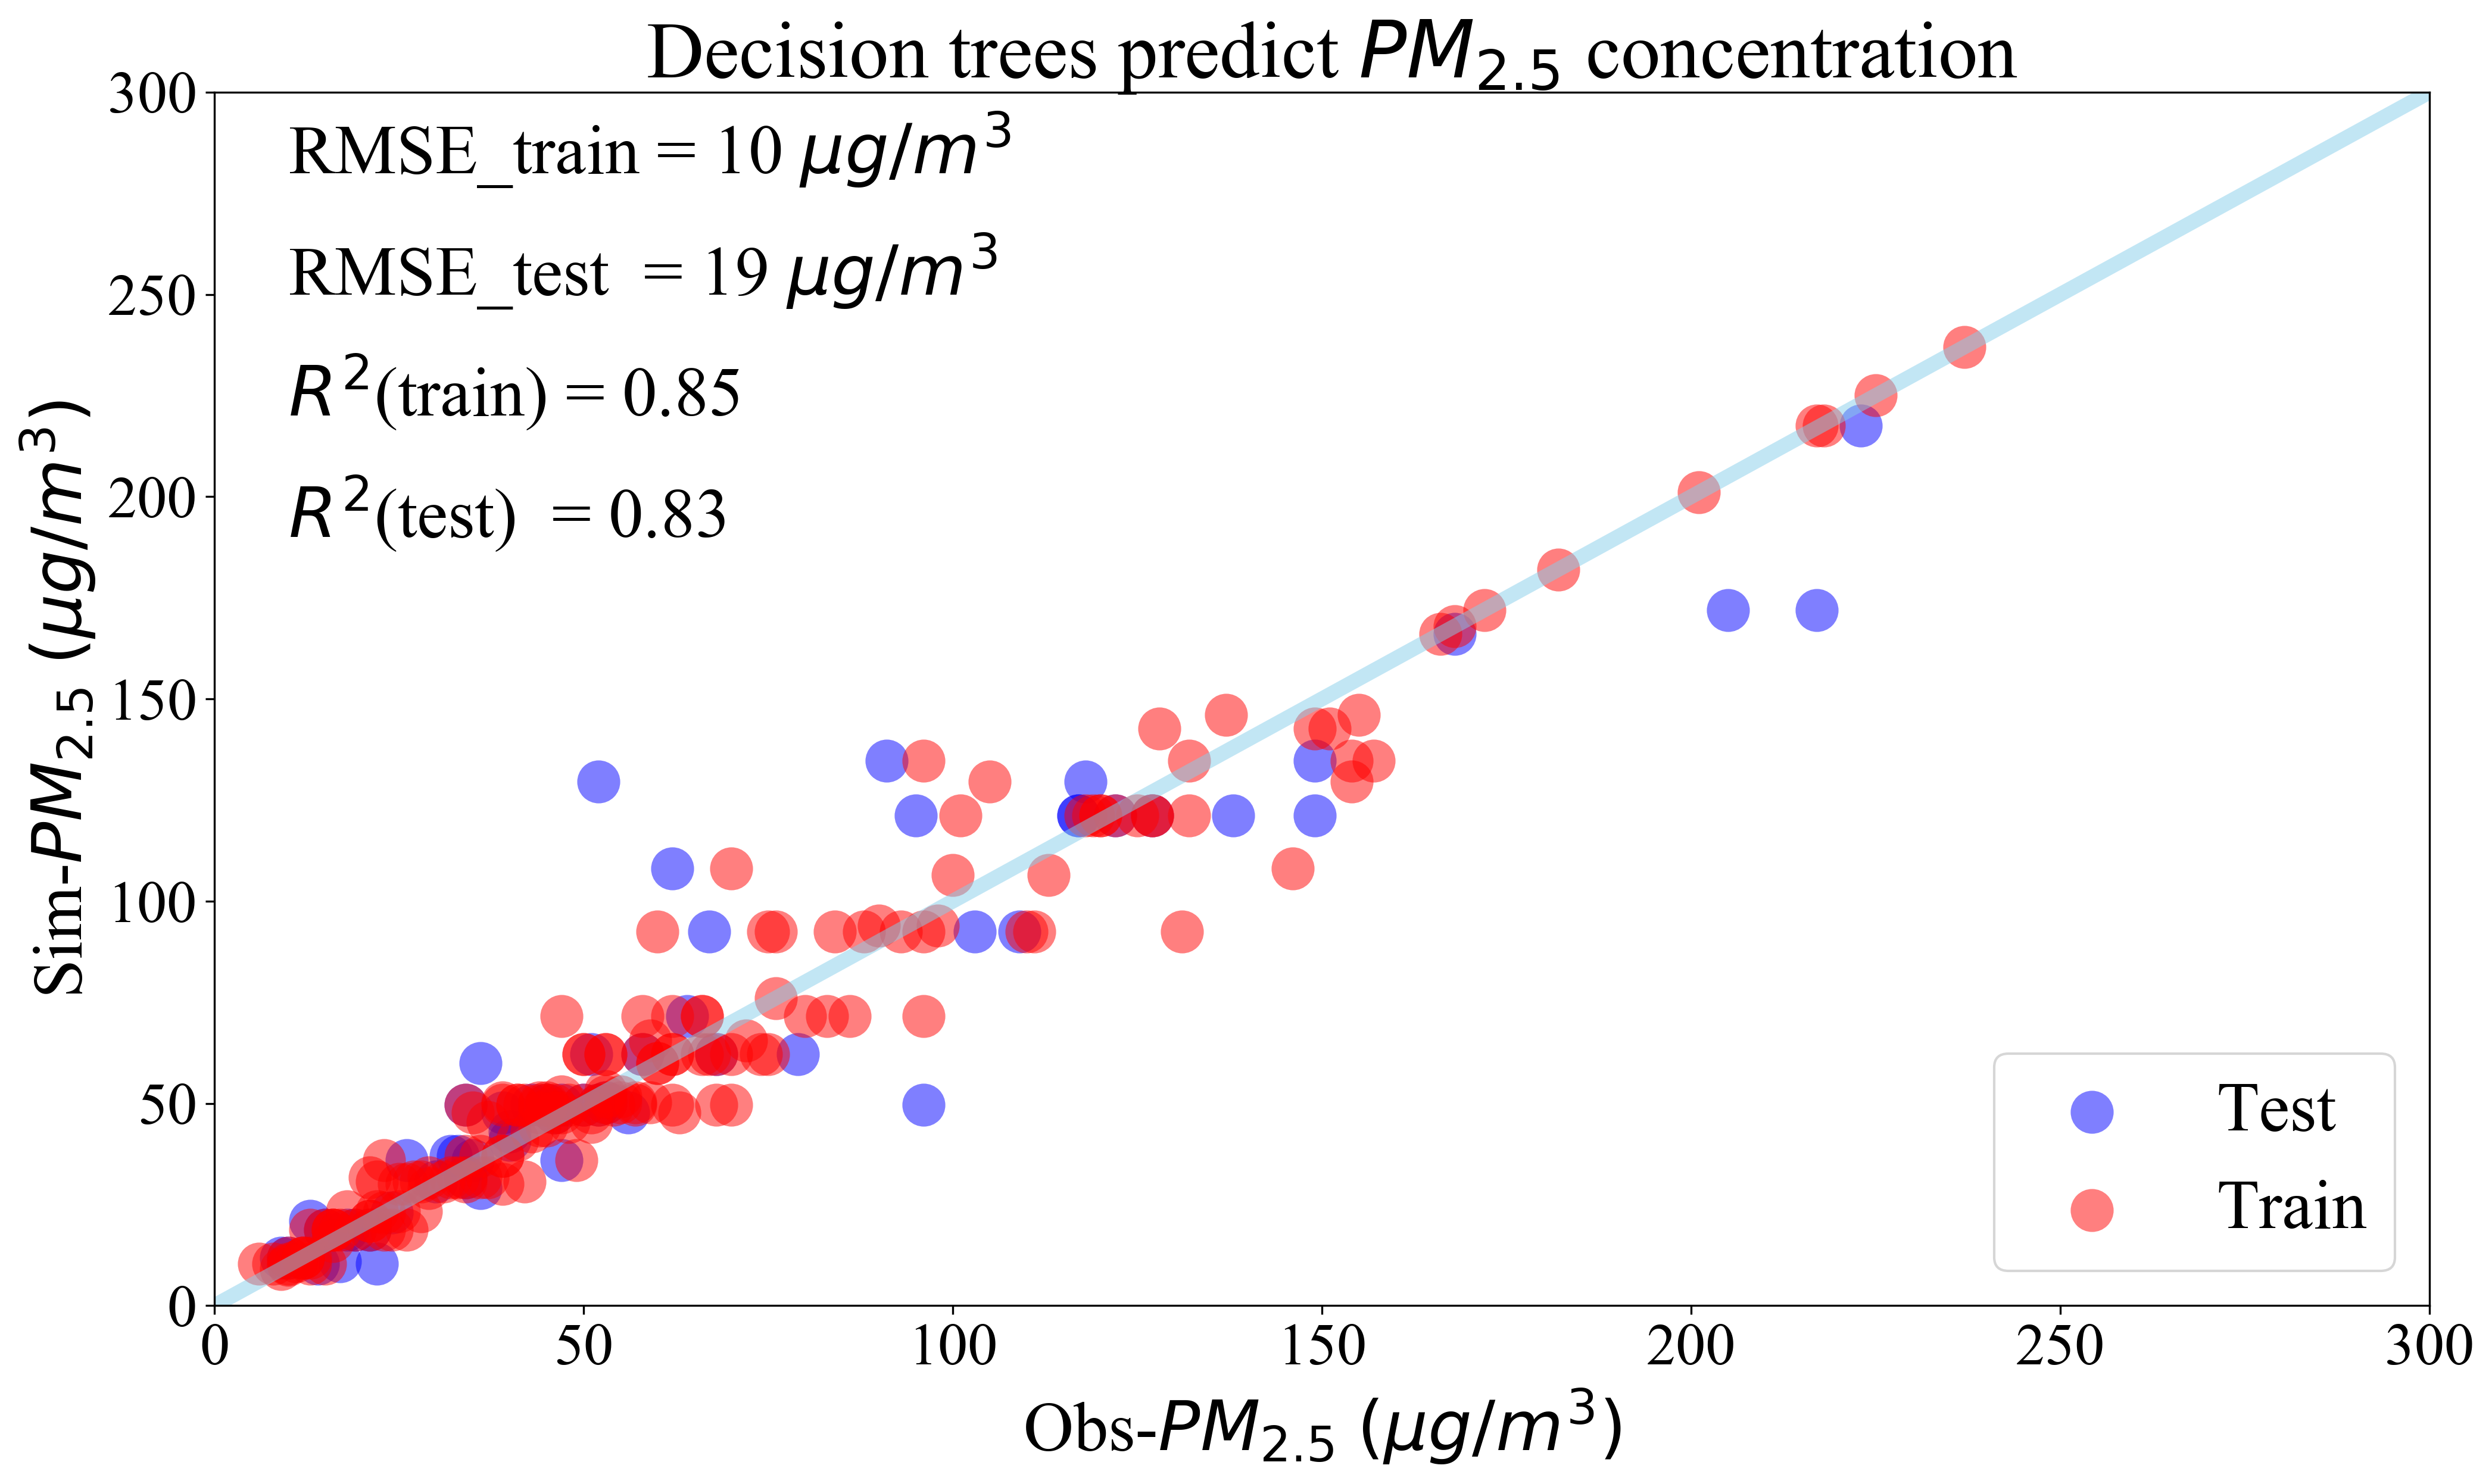

In [20]:
import math
X=AQI[x_cols]
y=AQI[y_cols]
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=36)
regr = DecisionTreeRegressor(max_depth=6)
regr.fit(X_train, y_train)
y = regr.predict(X_test)
y_train_pred=regr.predict(X_train)
y_pred = regr.predict(X_test)
from sklearn import metrics
print ('MSE train: %.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_pred)))
#评估决定系数(coefficient of determination)，是MSE的标准化
#print ('R^2 train: %.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_pred)))
RMSE_train=math.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=math.sqrt(mean_squared_error(y_test,y_pred))
#MSE_test_A=mean_squared_error(y_test,y_pred)
#R2_train_A=r2_score(y_train,y_train_pred)
R2_test_A=r2_score(y_test,y_pred)
print(RMSE_train,RMSE_test)
fig = plt.figure(figsize=(16,9),dpi= 300)
plt.subplot(111)
plt.tick_params(labelsize=24)
#plt.plot(Time,PMC_sim,c='blue',marker = 'o',linewidth=3,alpha=0.5,label="Simulation")
#plt.plot(Time,PMC_obs,c='red', marker = 'o',linewidth=3,alpha=0.5,label="Observation")
plt.scatter(y_test,y_pred,c='blue',s=300,marker = 'o',linewidth=0,alpha=0.5,label="Test")
plt.scatter(y_train,y_train_pred,c='red',s=300,marker = 'o',linewidth=0,alpha=0.5,label="Train")
x = np.arange(0, 300, 0.1)
y=x
plt.plot(x, y,c='skyblue',alpha=0.5,linewidth=6)
plt.ylim(0,300)
plt.xlim(0,300)
#plt.legend(loc="upper right",fontsize=28) #显示图中的标签
plt.xlabel('Obs-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
plt.ylabel('Sim-$PM_{2.5}$'+ ' '+'$ (µg/m^3)$',fontsize=28)
plt.legend(loc="lower right",fontsize=28)
titlestr=' Decision trees predict $PM_{2.5}$ concentration'
plt.title(titlestr,fontsize=32)
#plt.text(5,175,'Training set of model',fontsize=32)
plt.text(10,280,'RMSE_train = 10 $ µg/m^3$',fontsize=28)
plt.text(10,250,'RMSE_test  = 19 $ µg/m^3$',fontsize=28)
plt.text(10,220,'$R^2$(train) = 0.85 ',fontsize=28)
plt.text(10,190,'$R^2$(test)  = 0.83 ',fontsize=28)
plt.savefig(str(titlestr)+'.png')
plt.show()

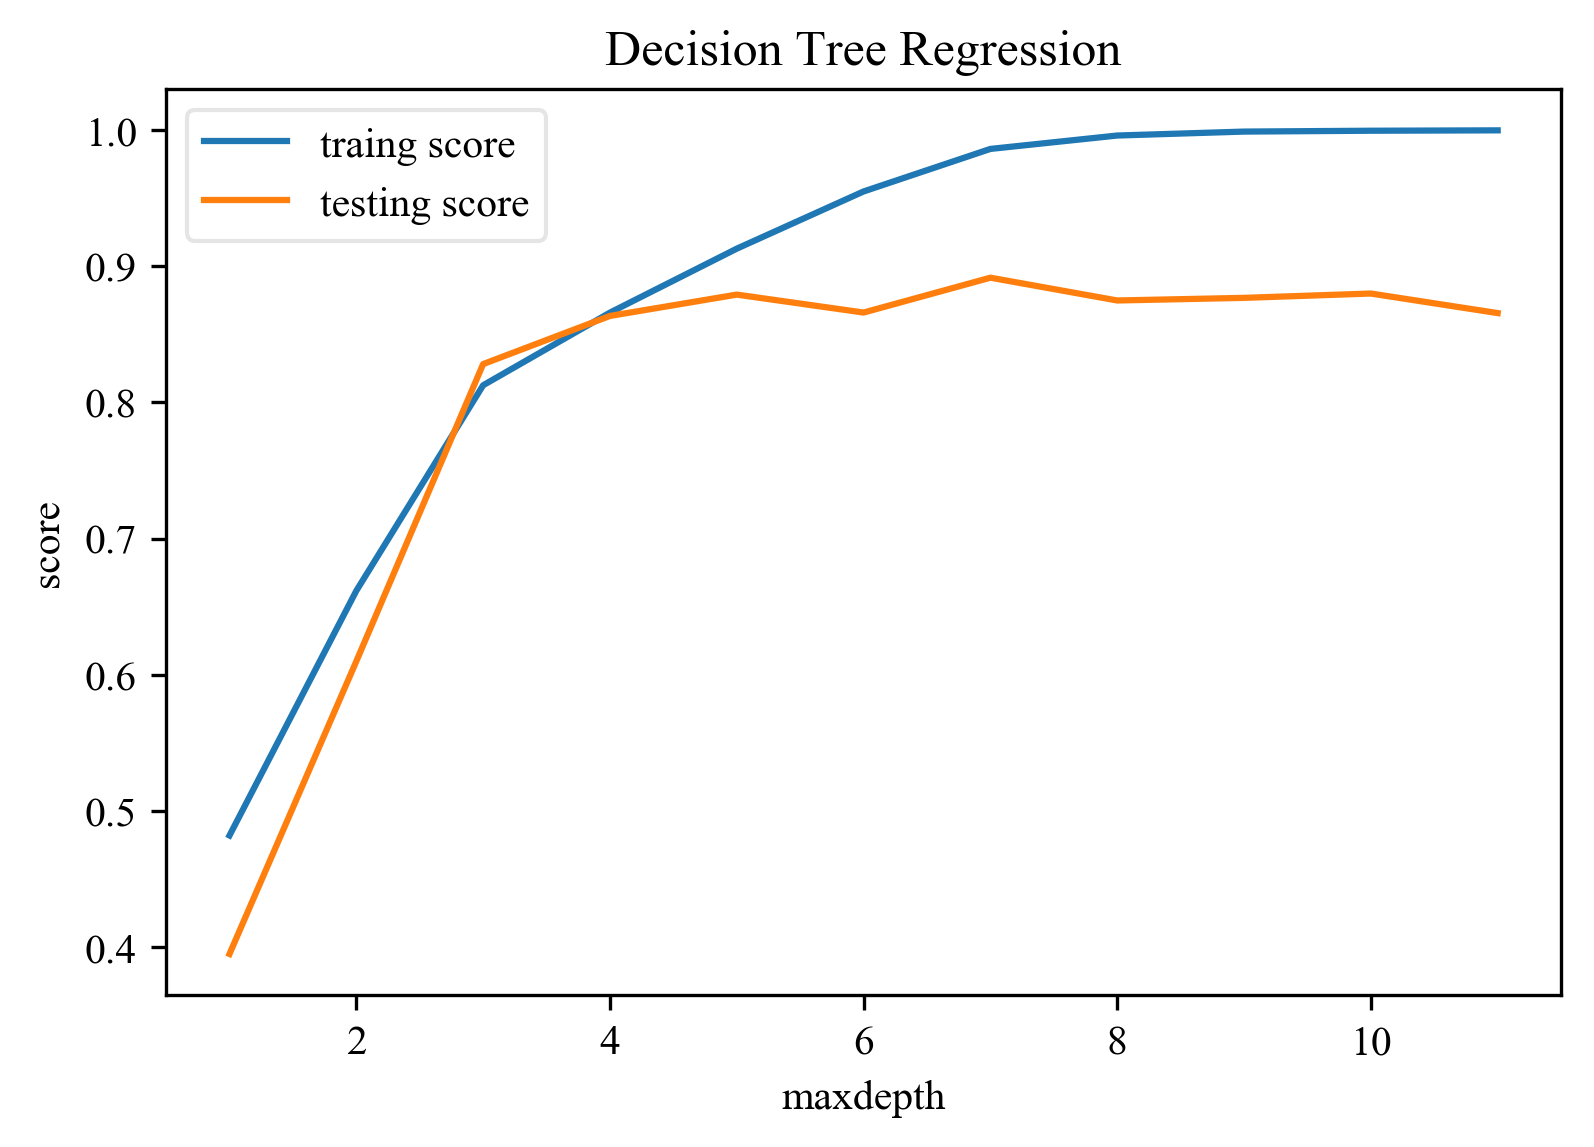

In [21]:
from sklearn import model_selection

def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure(dpi= 300)
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
       
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=12)

In [22]:
import pydotplus
from sklearn import tree
dot_data = tree.export_graphviz(regr, filled=True,rounded=True,special_characters=True,feature_names=x_cols) 
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_pdf("日照决策树.pdf")

True